In [54]:
import pandas as pd


df = pd.read_csv('KaggleV2-May-2016.csv')
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
list(df)

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show']

In [ ]:
df_temp = df.groupby('Neighbourhood').aggregate(lambda x: sum(x=='No')/len(x) if x.name=='No-show' else None)['No-show']
df_temp.describe()

count    81.000000
mean      0.794573
std       0.097230
min       0.000000
25%       0.782546
50%       0.802412
75%       0.820093
max       1.000000
Name: No-show, dtype: float64

In [18]:
df_temp = df.groupby('Gender').aggregate(lambda x: sum(x=='No')/len(x) if x.name=='No-show' else None)['No-show']
df_temp.describe()

count    2.000000
mean     0.798587
std      0.002451
min      0.796854
25%      0.797721
50%      0.798587
75%      0.799454
max      0.800321
Name: No-show, dtype: float64

In [20]:
df_temp = df.groupby('Age').aggregate(lambda x: sum(x=='No')/len(x) if x.name=='No-show' else None)['No-show']
df_temp.describe()

count    104.000000
mean       0.809130
std        0.069335
min        0.400000
25%        0.771534
50%        0.814120
75%        0.838632
max        1.000000
Name: No-show, dtype: float64

<Axes: xlabel='No-show', ylabel='Age'>

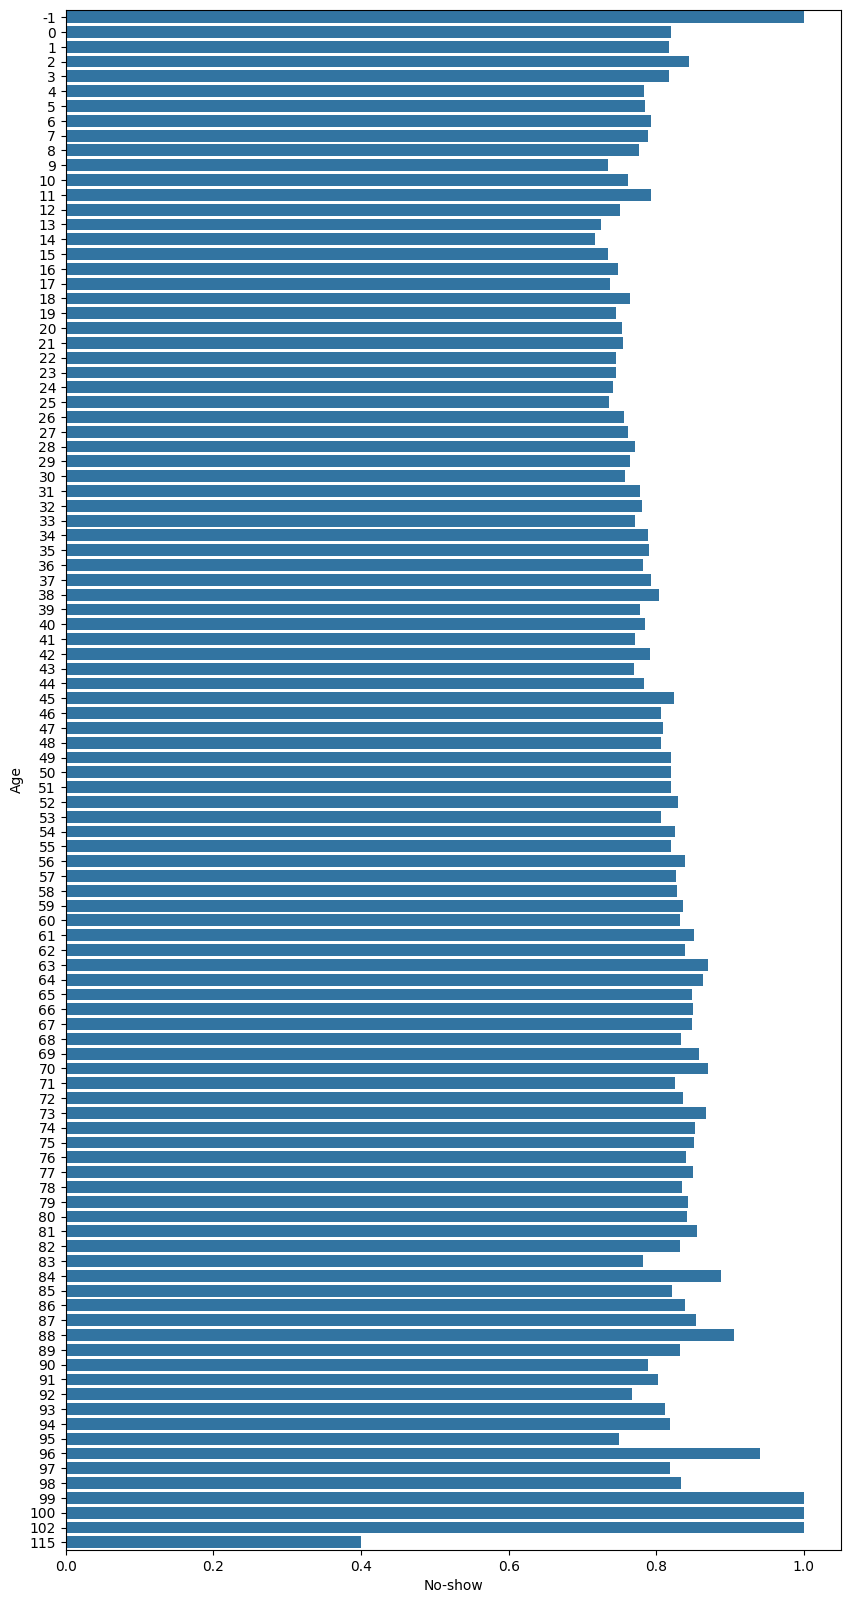

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,20))
sns.barplot(df_temp, orient='h')

In [32]:
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1


In [ ]:
target = df['No-show']


import datetime

scheduled_day_dt = pd.to_datetime(df['ScheduledDay']).dt.date
Appoint_day_dt = pd.to_datetime(df['AppointmentDay']).dt.date
d_t = Appoint_day_dt - scheduled_day_dt
df['d_t'] = d_t.apply(lambda x: x.days)


df['Gender'] = df['Gender'].map({'M':0, 'F':1})


df.drop(['PatientId', 'AppointmentID', 'No-show', 'Neighbourhood', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df.select_dtypes(exclude='object'))


In [57]:
df

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,d_t
0,1,62,0,1,0,0,0,0,0
1,0,56,0,0,0,0,0,0,0
2,1,62,0,0,0,0,0,0,0
3,1,8,0,0,0,0,0,0,0
4,1,56,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
110522,1,56,0,0,0,0,0,1,35
110523,1,51,0,0,0,0,0,1,35
110524,1,21,0,0,0,0,0,1,41
110525,1,38,0,0,0,0,0,1,41


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV



X_train, X_test, y_train, y_test = train_test_split(scaled, target, test_size=0.2, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0)


param_grid = {'criterion':['gini', 'entropy', 'log_loss'],
              'min_samples_leaf': [1, 2, 3, 4]}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, verbose=2, refit = True)
grid.fit(X_val,y_val)

# clf = DecisionTreeClassifier()




Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .................criterion=gini, min_samples_leaf=1; total time=   0.0s
[CV] END .................criterion=gini, min_samples_leaf=1; total time=   0.0s
[CV] END .................criterion=gini, min_samples_leaf=1; total time=   0.0s
[CV] END .................criterion=gini, min_samples_leaf=1; total time=   0.0s
[CV] END .................criterion=gini, min_samples_leaf=1; total time=   0.0s
[CV] END .................criterion=gini, min_samples_leaf=2; total time=   0.0s
[CV] END .................criterion=gini, min_samples_leaf=2; total time=   0.0s
[CV] END .................criterion=gini, min_samples_leaf=2; total time=   0.0s
[CV] END .................criterion=gini, min_samples_leaf=2; total time=   0.0s
[CV] END .................criterion=gini, min_samples_leaf=2; total time=   0.0s
[CV] END .................criterion=gini, min_samples_leaf=3; total time=   0.0s
[CV] END .................criterion=gini, min_sa

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [1, 2, 3, 4]},
             verbose=2)

In [73]:
best_par = grid.best_params_

clf = grid.best_estimator_

clf.fit(X_train, y_train)
clf.score(X_test, y_test)
y_predict = clf.predict(X_test)


In [74]:
from sklearn.metrics import confusion_matrix



confusion_matrix(y_test, y_predict)

array([[8221,  612],
       [1893,  327]])

In [77]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.764498326246268